In [2]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Latex object>

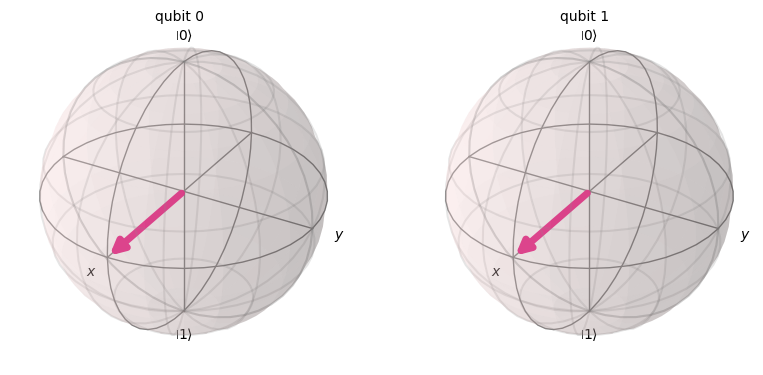

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)

svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
final_state = result.get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)


In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

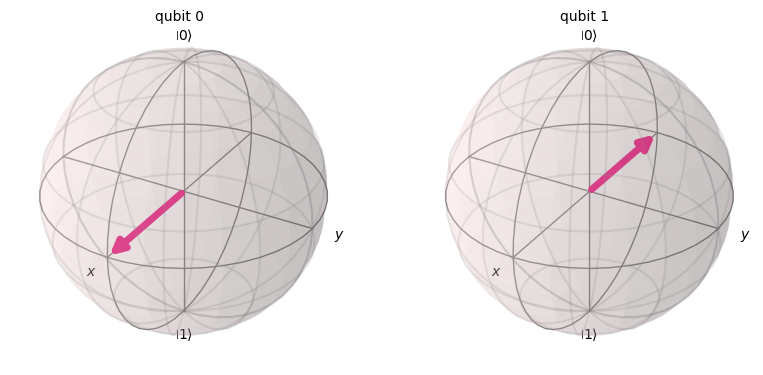

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())

# Copy and save state
qc1 = qc.copy()
qc1.save_statevector()

# Run the simulation
svsim = Aer.get_backend('aer_simulator')  # safer alias
result = svsim.run(qc1).result()
final_state = result.get_statevector(0)

# Display results
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

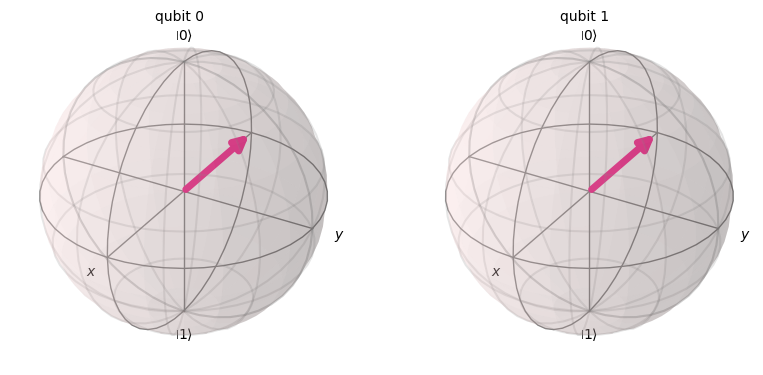

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0, 1)
display(qc.draw())

# Use statevector_simulator directly
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
final_state = result.get_statevector(qc)

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

In [15]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
display(qc.draw())

usim = Aer.get_backend('aer_simulator')
qc.save_unitary()

# Run the circuit directly (NO assemble!)
result = usim.run(qc).result()
unitary = result.data(0)['unitary']

display(array_to_latex(unitary, prefix="\\text{Circuit} = "))

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

In [16]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
display(qc.draw())

# Setup simulator
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()

# Run without assemble()
result = usim.run(qc).result()
unitary = result.data(0)['unitary']

display(array_to_latex(unitary, prefix="\\text{Circuit} = "))


┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

In [18]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)  # Controlled-phase gate
display(qc.draw())

# Use aer_simulator for unitary simulation
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()

# Run the circuit directly
result = usim.run(qc).result()
unitary = result.data(0)['unitary']

display(array_to_latex(unitary, prefix="\\text{Controlled-T} = "))


q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

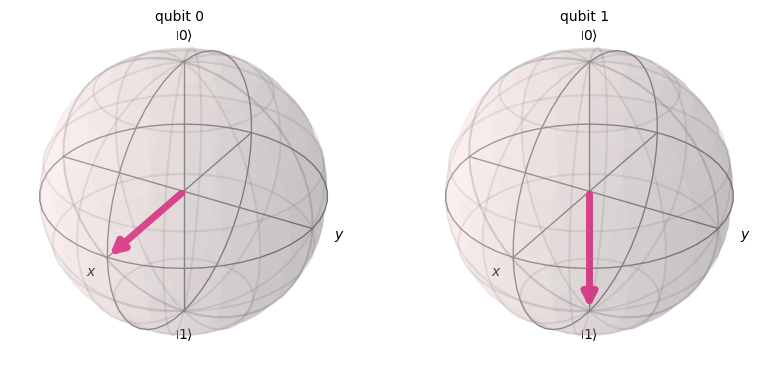

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())

# Use statevector simulator
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Run circuit directly (no assemble)
result = svsim.run(qc).result()
final_state = result.data(0)['statevector']

plot_bloch_multivector(final_state)


┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

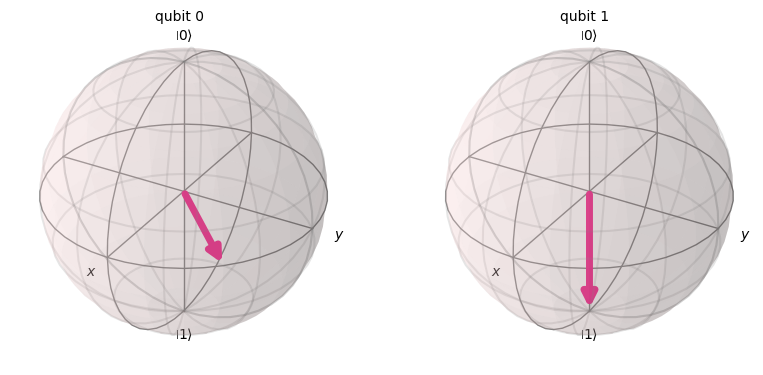

In [20]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1)  # Controlled-T gate
display(qc.draw())

# Use statevector simulator
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Run circuit directly (no assemble)
result = svsim.run(qc).result()
final_state = result.data(0)['statevector']

plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ H ├─■───────
     └───┘ │P(π/4) 
q_1: ──────■───────

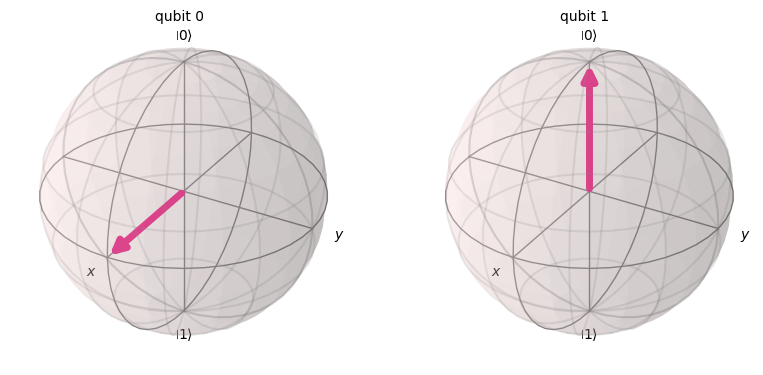

In [21]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4, 0, 1)  # Controlled-T gate
display(qc.draw())

# Use statevector simulator
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Run circuit directly (no assemble)
result = svsim.run(qc).result()
final_state = result.data(0)['statevector']

plot_bloch_multivector(final_state)

┌───┐          
q_0: ┤ H ├─■────────
     ├───┤ │P(-π/2) 
q_1: ┤ X ├─■────────
     └───┘

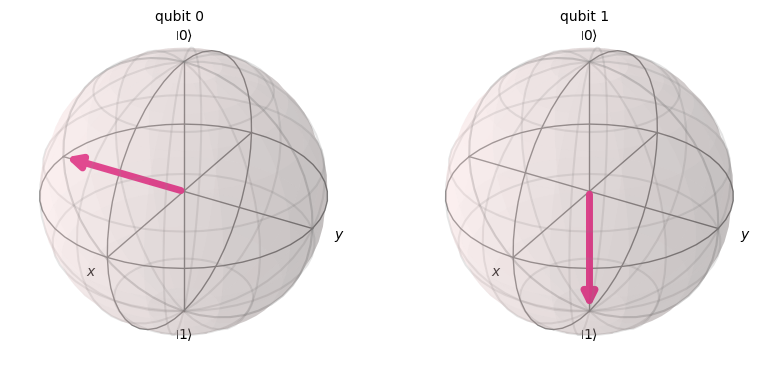

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/2, 0, 1)  # Controlled-T† gate
display(qc.draw())

# Use statevector simulator
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Run circuit
result = svsim.run(qc).result()
final_state = result.data(0)['statevector']

plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ X ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

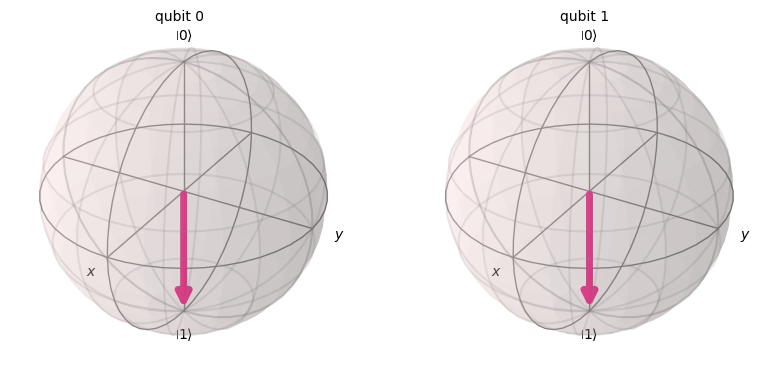

In [23]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cp(pi/4, 0, 1)  # Controlled-T gate
display(qc.draw())

# Use statevector simulator
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Run circuit
result = svsim.run(qc).result()
final_state = result.data(0)['statevector']

plot_bloch_multivector(final_state)